<a href="https://colab.research.google.com/github/amdadev/amdadev/blob/main/tomato_incption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras,os
import numpy as np
import tensorflow as tf
import cv2
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential , load_model , Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import applications
from tensorflow.keras import optimizers

In [ ]:
base_dir=r"/content/drive/MyDrive/tomato/train-tomato.zip"

In [ ]:
import zipfile

# Specify the path to the zip file
zip_file_path = r"/content/drive/MyDrive/tomato/train-tomato.zip"

# Specify the directory where you want to extract the contents
extract_to_directory = r"/content/drive/MyDrive/tomato/"

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(extract_to_directory)

print("Extraction complete.")


Extraction complete.


In [ ]:
data_dir = r'/content/drive/MyDrive/tomato/train'


image_generator = ImageDataGenerator(validation_split=0.3)



train_data_dir = image_generator.flow_from_directory(batch_size=32,
                                                 directory=data_dir,
                                                 shuffle=True,
                                                 target_size=(299, 299),
                                                 subset="training",
                                                 class_mode='categorical')

validation_dir = image_generator.flow_from_directory(batch_size=32,
                                                 directory=data_dir,
                                                 shuffle=True,
                                                 target_size=(299, 299),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 5652 images belonging to 9 classes.
Found 2415 images belonging to 9 classes.


In [ ]:
base_model = applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(9, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('Inception_v3_TL_tomato.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=False,
                             period=1,
                             verbose=1)

In [ ]:
callbacks = [checkpoint]
epochs = 20
batch_size = 32

In [ ]:
history = model.fit_generator(
    train_data_dir,
    steps_per_epoch = train_data_dir.samples // batch_size,
    validation_data = validation_dir,
    validation_steps = validation_dir.samples // batch_size,
    epochs = epochs,
    callbacks=callbacks
    )

model.save('Inception_v3_TL_tomato.h5')

<ipython-input-9-0643ac527cd8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
176/176 [==============================] - ETA: 0s - loss: 0.9087 - accuracy: 0.7027
Epoch 1: saving model to Inception_v3_TL_tomato.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


176/176 [==============================] - 167s 732ms/step - loss: 0.9087 - accuracy: 0.7027 - val_loss: 0.6083 - val_accuracy: 0.7754
Epoch 2/20
176/176 [==============================] - ETA: 0s - loss: 0.2530 - accuracy: 0.9240
Epoch 2: saving model to Inception_v3_TL_tomato.h5
176/176 [==============================] - 102s 580ms/step - loss: 0.2530 - accuracy: 0.9240 - val_loss: 0.3268 - val_accuracy: 0.8904
Epoch 3/20
176/176 [==============================] - ETA: 0s - loss: 0.1266 - accuracy: 0.9632
Epoch 3: saving model to Inception_v3_TL_tomato.h5
176/176 [==============================] - 102s 582ms/step - loss: 0.1266 - accuracy: 0.9632 - val_loss: 0.3162 - val_accuracy: 0.8913
Epoch 4/20
176/176 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.9783
Epoch 4: saving model to Inception_v3_TL_tomato.h5
176/176 [==============================] - 103s 583ms/step - loss: 0.0760 - accuracy: 0.9783 - val_loss: 0.2878 - val_accuracy: 0.9054
Epoch 5/20
176/176 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


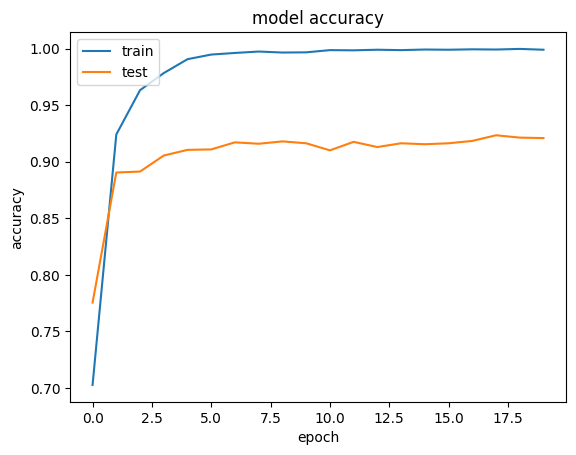

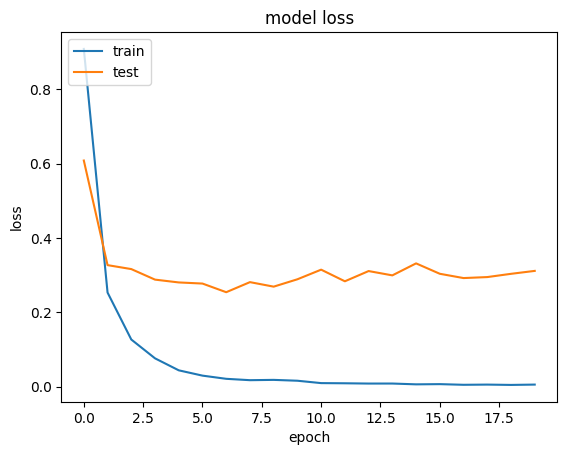

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
data_dir = r'/content/drive/MyDrive/tomato/train'

image_generator = ImageDataGenerator(validation_split=0.3)

train_data_dir = image_generator.flow_from_directory(
    batch_size=32,
    directory=data_dir,
    shuffle=True,
    target_size=(299, 299),
    subset="training",
    class_mode='categorical'
)

validation_dir = image_generator.flow_from_directory(
    batch_size=32,
    directory=data_dir,
    shuffle=True,
    target_size=(299, 299),
    subset="validation",
    class_mode='categorical'
)



Found 5652 images belonging to 9 classes.
Found 2415 images belonging to 9 classes.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Step 1: Make predictions using the trained model
validation_data = []
validation_labels = []

for batch in validation_dir:
    images, labels = batch
    validation_data.append(images)
    validation_labels.append(labels)

validation_data = np.vstack(validation_data)
validation_labels = np.vstack(validation_labels)

predictions = model.predict(validation_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(validation_labels, axis=1)

# Step 2: Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Step 3: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_data_dir.class_indices.keys(),
            yticklabels=train_data_dir.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Print classification report
print(classification_report(true_labels, predicted_labels, target_names=train_data_dir.class_indices.keys()))
